In [1]:
import numpy as np
from funcs import *

from copy import deepcopy

In [2]:
plot_settings()
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
# заводим функции
# 1-v

mu = 8*1e5
f_0 = 300

x_ = lambda t: np.cos(2*np.pi*f_0*t + mu*t**2)

beta = 3*1e3

k_ = lambda t: np.exp(-beta*t)

size = 1000

a, b = 0, 0.01

t = np.linspace(a, b, size)

k = k_(t)
x_exact = x_(t)

f = np.convolve(k, x_exact)

t_conv = np.linspace(a, (t[1]-t[0])*len(f), len(f))

In [4]:
def _iteration(x_current, f, k, alpha=1):
    x_next = x_current + alpha*(f[:k.size] - np.convolve(k, x_current)[:k.size])
    return x_next

In [5]:
def solve_iterative(f_noise, k, alpha=1, x_0=None, m_max=100, eps = 1e-2):
    if not x_0:
        x_0 = np.zeros_like(f_noise[:k.size])
    x_current = deepcopy(x_0)
    x_new = _iteration(x_current, f_noise, k, alpha)
    xs = [x_new]
    i = 0
    m = None
    condition1 = lambda x1, x2: np.linalg.norm(x1 - x2)/np.linalg.norm(x2) <= eps
    for i in range(m_max):
        x_current = deepcopy(x_new)
        x_new = _iteration(x_current, f_noise, k, alpha)
        xs.append(x_new)
        if condition1(x_current, x_new):
            if not m:
                m = deepcopy(i)

    return x_new, xs, m

In [6]:
sigma = 0.1

f_noise = f + gaussian_noise(f.shape, sigma=sigma)

In [7]:
x_solution, xs, m = solve_iterative(f_noise, k, 0.01, m_max=int(1e3))

In [8]:
norms = [np.linalg.norm(x - x_exact) for x in xs]

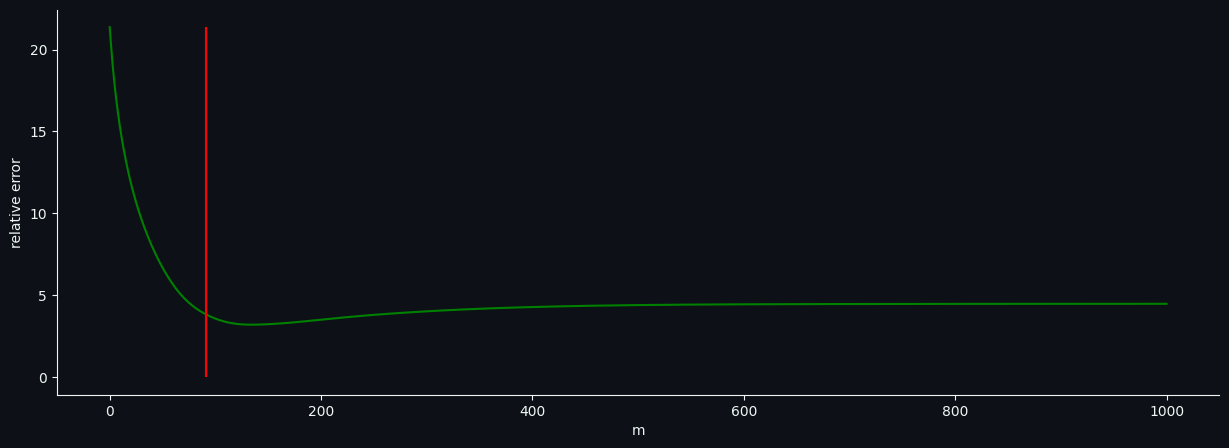

In [9]:
plt.plot(norms)
plt.xlabel("m")
plt.ylabel("relative error")
plt.vlines([m], 0, max(norms), color='r')

In [10]:
def plt_alpha(alpha, eps=1e-2, m_max=10000):
    x_solution, xs, m = solve_iterative(f_noise, k, alpha, m_max=m_max, eps=eps)
    norms = [np.linalg.norm(x - x_exact) for x in xs]
    plt.plot(norms, label=f"{alpha:.2}")

    plt.xlabel("m")
    plt.ylabel("relative error")
    plt.legend(labelcolor="w")
    #plt.vlines([m], 0, max(norms), color='r')
    #plt.title(f"alpha={alpha}", color="w")
    
    

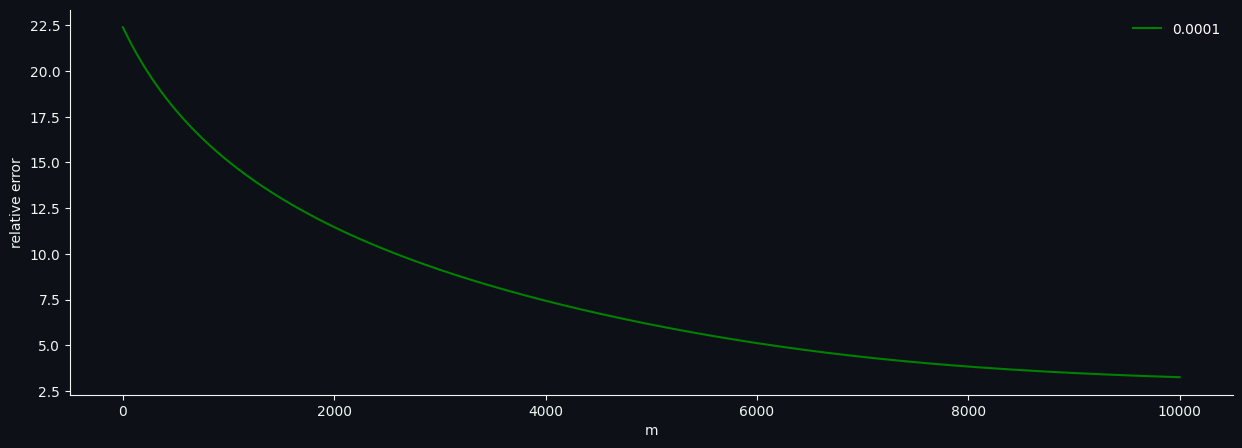

In [11]:
plt_alpha(0.0001)

(0.0, 7.0)

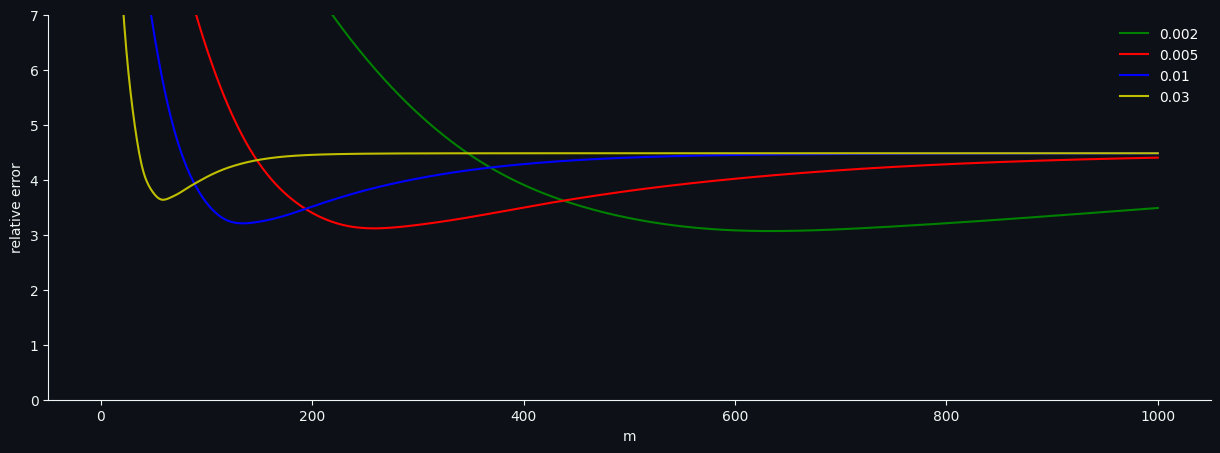

In [12]:
max_m = 1000
plt_alpha(0.002, m_max=max_m)
plt_alpha(0.005, m_max=max_m)
plt_alpha(0.01, m_max=max_m)
plt_alpha(0.03, m_max=max_m)
plt.ylim(0, 7)


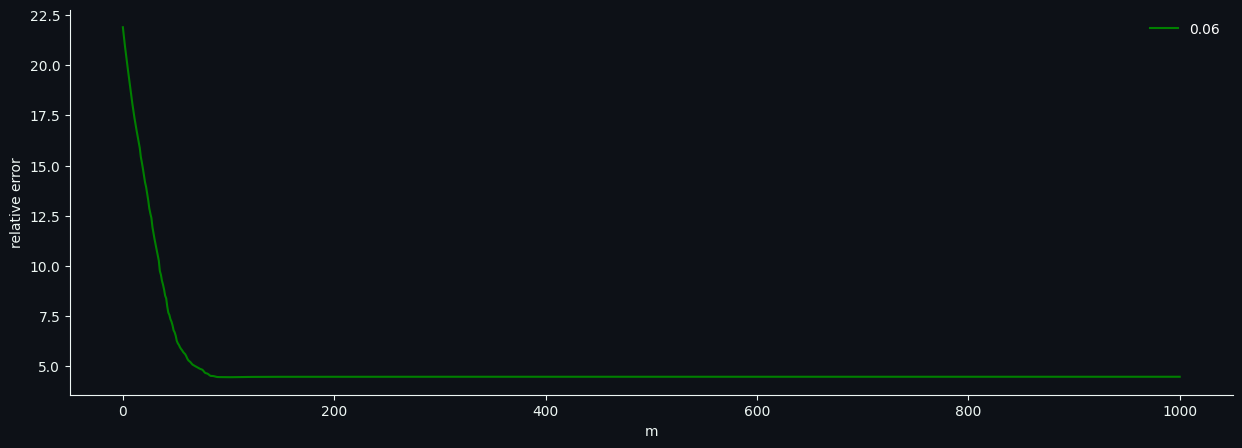

In [13]:
plt_alpha(0.06, m_max=1000)

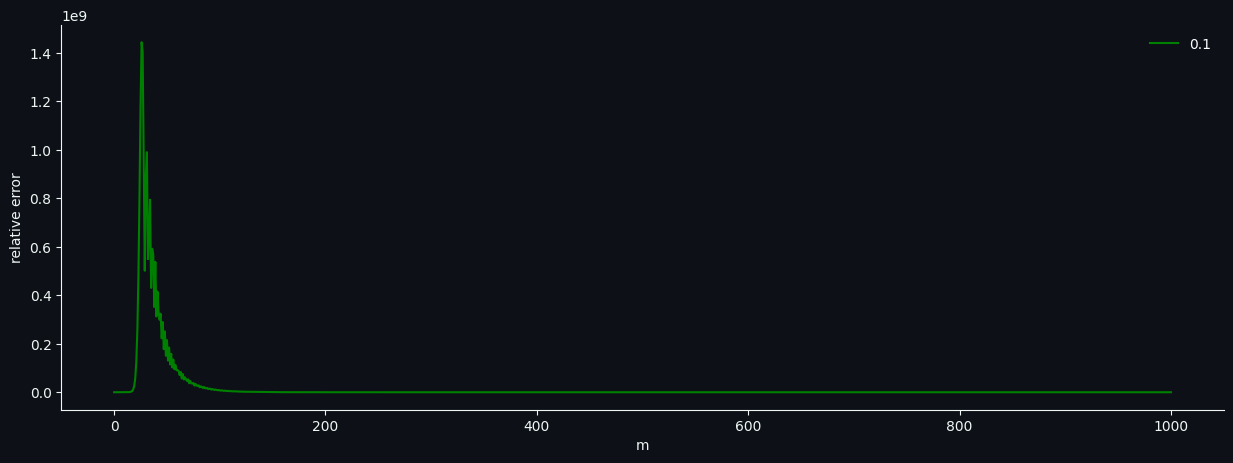

In [14]:
plt_alpha(0.1, m_max=1000)

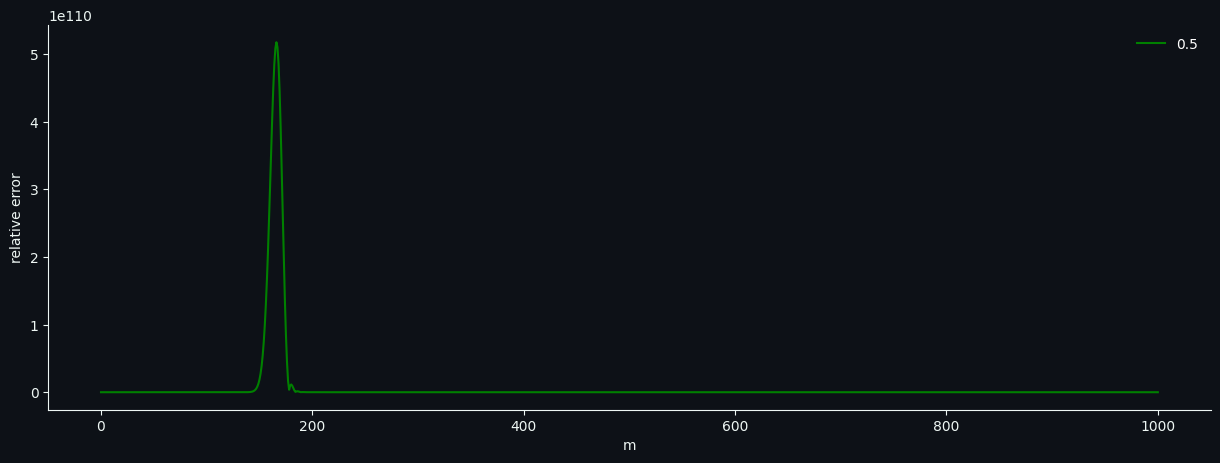

In [16]:
plt_alpha(0.5, m_max=1000)